#### Amazinum. Task 10. Kmeans with 'make_classification' and with synthetic dataset. Moisei.

#### Load Data

<IPython.core.display.Javascript object>


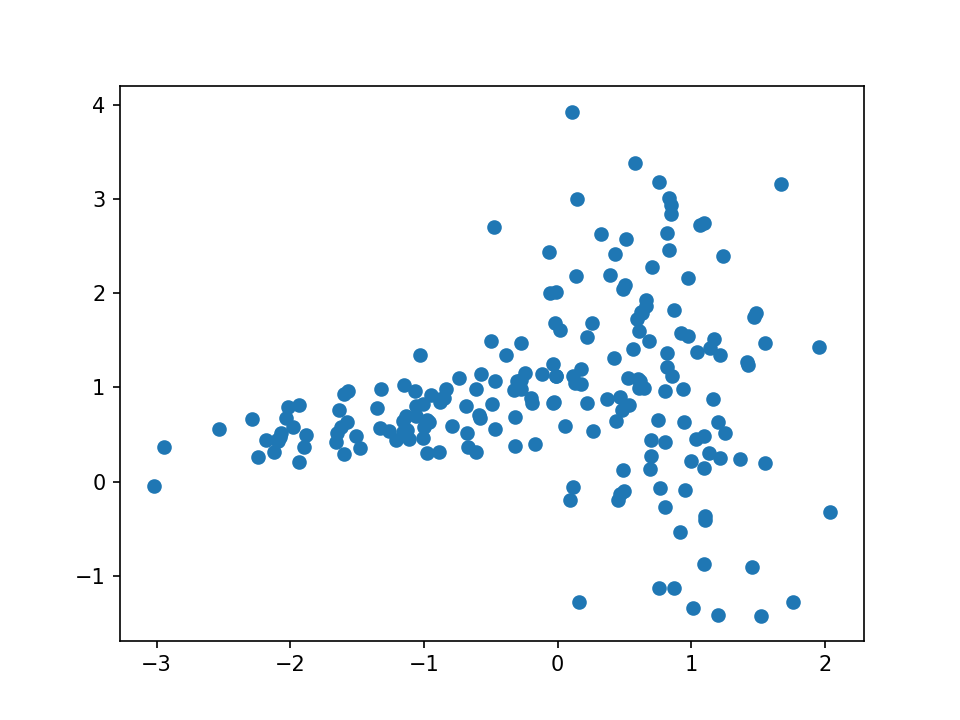

In [505]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib notebook

from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

<IPython.core.display.Javascript object>


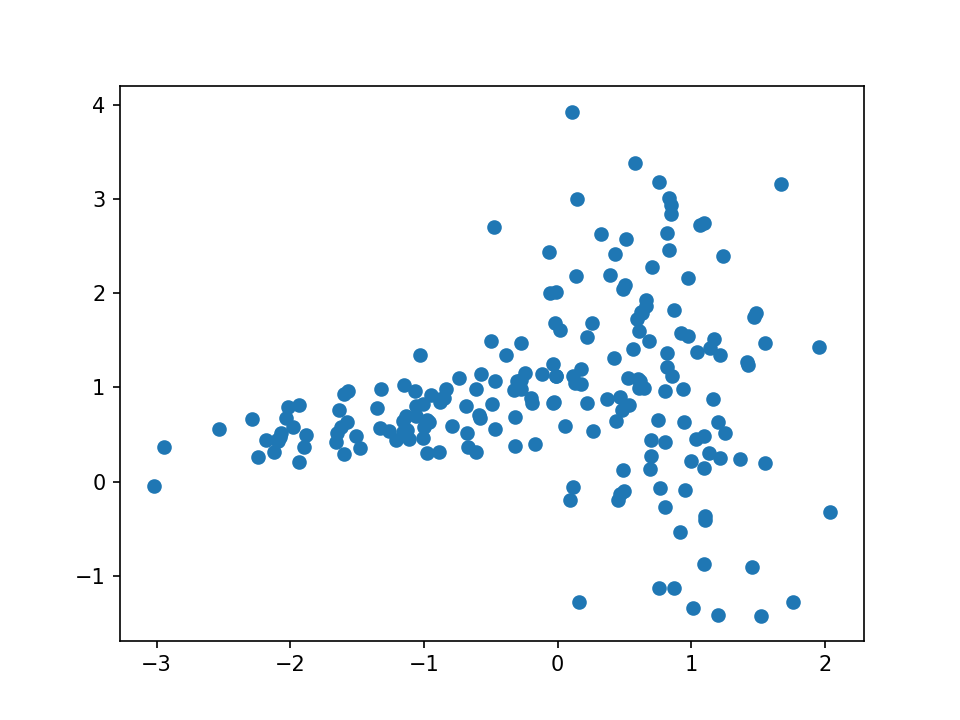

In [506]:
colors = np.array(['green','orange','grey', 'brown'])
def plot_points(closest_centroids = None):
    if closest_centroids is None:
        plt.scatter(Xc_2[:,0], Xc_2[:,1])
    else:
        plt.scatter(Xc_2[:,0], Xc_2[:,1], c= colors[closest_centroids])

        
plt.figure()
plot_points()

#### Init centroids

[[-2  1]
 [ 0  3]
 [ 1  1]
 [ 1 -1]]


<IPython.core.display.Javascript object>


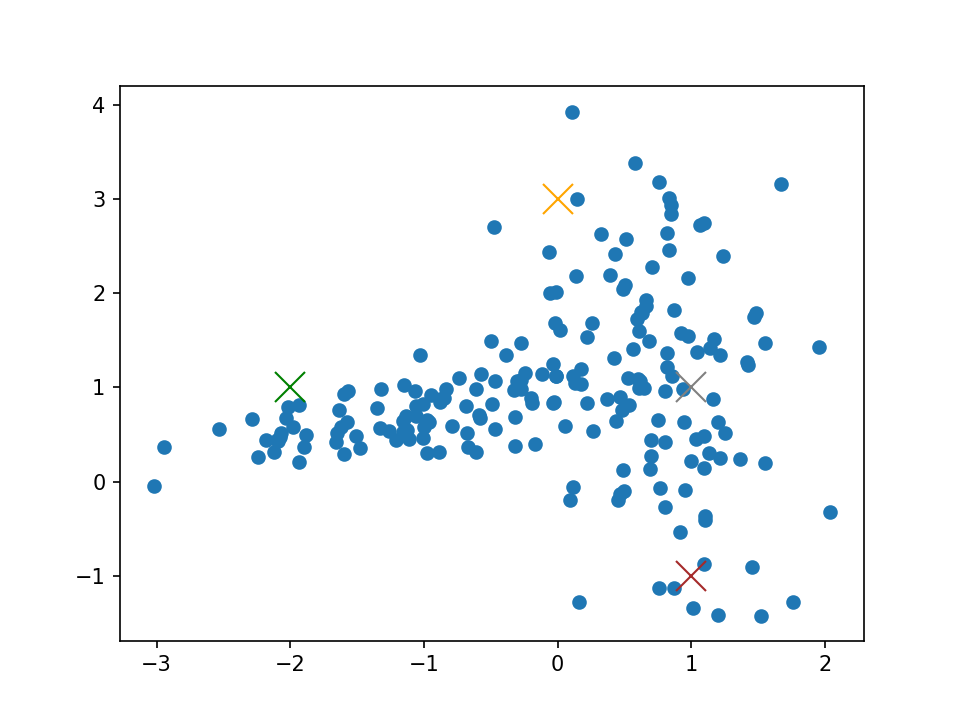

In [507]:
def init_centroids(amount, is_random = True, points = None, seed = 10): 
    if is_random:
        np.random.seed = (seed) 
        return points [np.random.choice(len(points), amount)]        
    else:
        centroids = np.array ([(-2,1), (0,3), (1,1), (1,-1)])
        return centroids[:amount]

# centroids = init_centroids(2, is_random= False)
centroids = init_centroids(4, is_random= False)
print (centroids)

def plot_centroids(centroids):
    for i, c in enumerate (centroids):
        plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 

def draw_state(centroids = None, closest_centroids = None):        
    plt.figure ()
    plot_points(closest_centroids)
    plot_centroids(centroids)

draw_state(centroids = centroids, closest_centroids=None)

#### Convert data into single array

In [508]:
points = np.array(list((zip(Xc_2[:,0], Xc_2[:,1]))))
points[:5]

array([[ 0.87033369, -1.12915356],
       [-0.27565612,  1.07888341],
       [ 0.68590571,  1.4901946 ],
       [ 1.16581799,  0.87715301],
       [-1.0607126 ,  0.6950888 ]])

#### Compute distances from samples to centroids

In [509]:
def compute_distances(samples, centroids):
    '''
    params:
        samples - array of samples(pairs of coordinates) to compute from each the distance to sentroid e.g. array([[17, 83],[50, 67]])
        centroids - array of centroids coordinates e.g. array([[20, 20],[60, 80],[60, 10]])
    retruns: 2d array of distances from each sample to all centroid - the axis 0-centroids, 1-samples 
    '''    
    return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

# compute_distances(points[:3], centroids[:1]) # Note: make sue it is array/list of centroids not the single centroid  

compute_distances(points, centroids)

array([[3.57380895, 1.72614727, 2.73027109, 3.16820058, 0.98753818,
        0.20296043, 3.47073033, 0.80273018, 1.41098523, 2.67435779,
        2.11795437, 3.21018397, 3.1868194 , 1.99011581, 0.79042092,
        0.44005812, 2.10453953, 3.30274558, 0.58039916, 3.21225196,
        0.51892199, 3.08659628, 2.1332939 , 2.31089232, 3.13770344,
        2.96458312, 1.59246771, 4.01010946, 0.59711353, 3.39009692,
        3.43505764, 0.91986066, 1.15863309, 1.2350357 , 0.49039079,
        2.9410922 , 4.27537893, 0.56645317, 1.27899294, 3.52554745,
        1.45900329, 1.5345487 , 2.60254603, 4.39885987, 2.09244292,
        1.09924824, 0.69801265, 1.80664069, 3.81566572, 2.28676972,
        3.07953273, 3.44918845, 3.54888849, 1.16328478, 2.93516249,
        3.42758607, 0.53729792, 0.43369908, 2.59544017, 3.51066886,
        2.63713891, 0.93443406, 2.72564577, 1.02664587, 1.43472714,
        1.76651302, 1.33120029, 2.82833997, 1.44365082, 3.94479705,
        3.208608  , 2.09436653, 1.45654317, 3.62

#### Compute Cost

In [510]:
def J(centroids, closest_centroids):
    '''
    params: 
        centroids - list/array of pairs (coordinnates)  of centroids e.g. centroids = [(20,20), (60,80), (60,10)]
        closest_centroids - array of len= m (number of samples) that contains indices of centroids e.g. [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2
         1 2 2]
    '''
    all_dist = [] 
    for c_index in set(closest_centroids):
        assigned_samples = points[np.where(closest_centroids==c_index)]# select only points assigned to centroid
        all_dist_centroid = compute_distances(assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
    m = len(closest_centroids)
    return 1/m* np.sum(all_dist)


closest_centroids= np.zeros(len(points), dtype=int) # compute for case of all samples assigned to first centroid
print ('Cost= {}'.format(J(centroids, closest_centroids)))

Cost= 2.171918401510193


#### Step 1 of iteration: compute closest centroids

closest_centroids:
 [3 2 2 2 0 0 1 0 0 1 2 2 1 2 0 0 2 2 0 2 0 2 2 2 2 3 2 3 0 3 2 0 0 0 0 2 3
 0 0 1 0 2 2 3 2 0 0 2 3 2 3 2 2 0 1 2 0 0 2 1 2 0 3 0 0 2 0 2 0 3 2 2 0 3
 0 2 2 1 2 0 3 0 0 0 1 2 2 1 2 1 0 1 2 1 0 2 3 1 2 1 1 0 2 2 0 0 0 0 0 2 0
 2 0 2 0 2 2 1 0 1 2 1 1 0 3 2 0 2 2 0 2 1 2 2 2 3 2 2 2 2 2 2 2 0 2 2 2 0
 2 0 0 3 2 0 2 0 2 0 3 2 2 0 2 2 0 2 3 1 0 0 2 2 2 3 3 0 0 2 0 2 0 2 1 2 2
 2 2 1 0 2 2 1 0 0 2 2 1 3 2 2]
Cost= 0.8450377472744814


<IPython.core.display.Javascript object>


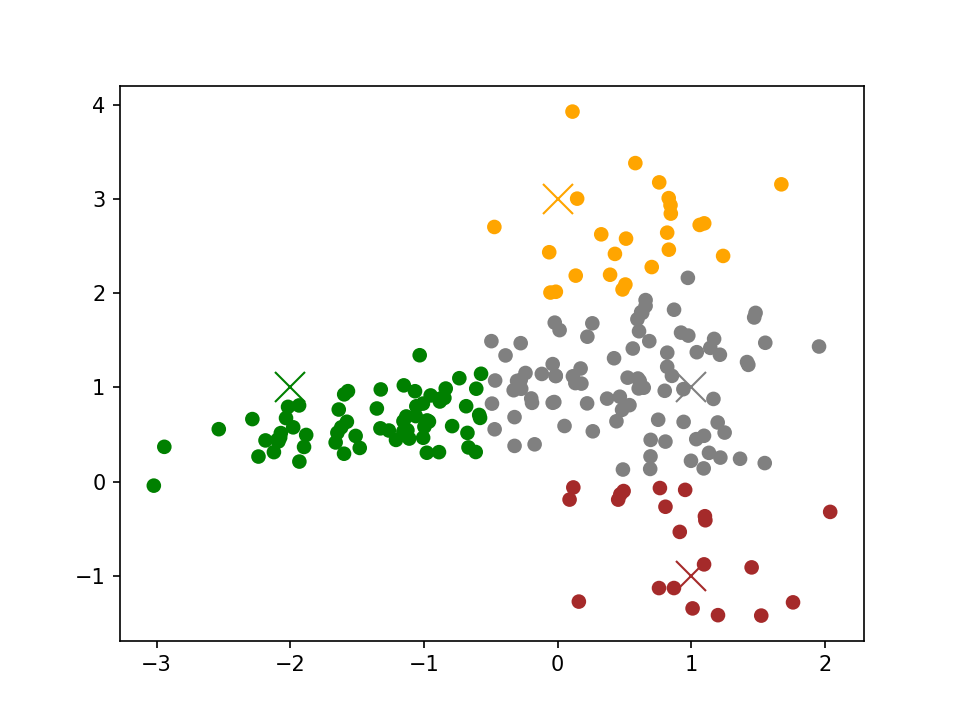

In [511]:
def compute_closest_centroids(centroids):       
    all_distances = compute_distances(points, centroids) #np.array([np.apply_along_axis(np.linalg.norm,1,points-c) for c in centroids])
    closest_centroids = np.apply_along_axis(np.argmin,0,all_distances)
    return closest_centroids

closest_centroids = compute_closest_centroids(centroids) 
print ('closest_centroids:\n',closest_centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)

#### Step 2 of iteration: compute means

New centroids: [array([-1.39135145,  0.62682871]), array([0.54950877, 2.63745419]), array([0.52725326, 1.04362131]), array([ 0.91145997, -0.64375866])]
Cost= 0.6359162864965662


<IPython.core.display.Javascript object>


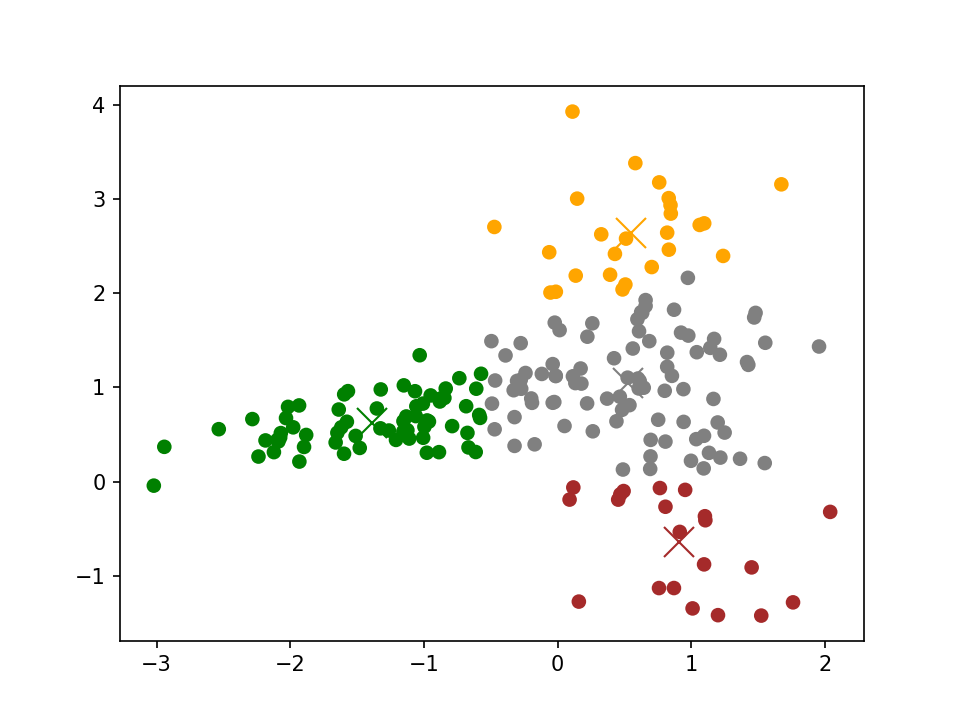

In [512]:
def compute_means(centroids, closest_centroids):     # need to consider all centroids in case of no assigned points to some centroid  
    new_centroids= []
    for i in range (len(centroids)):
        if i not in closest_centroids: # no assigned point assigned to this centroid 
            new_centroids.append(centroids[i])
        else: 
            new_centroid= np.mean(points[np.where(closest_centroids==i)], axis = 0)
            new_centroids.append(new_centroid)
    return new_centroids

centroids = compute_means(centroids, closest_centroids)
print ('New centroids:',centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)

#### Iterate

<IPython.core.display.Javascript object>


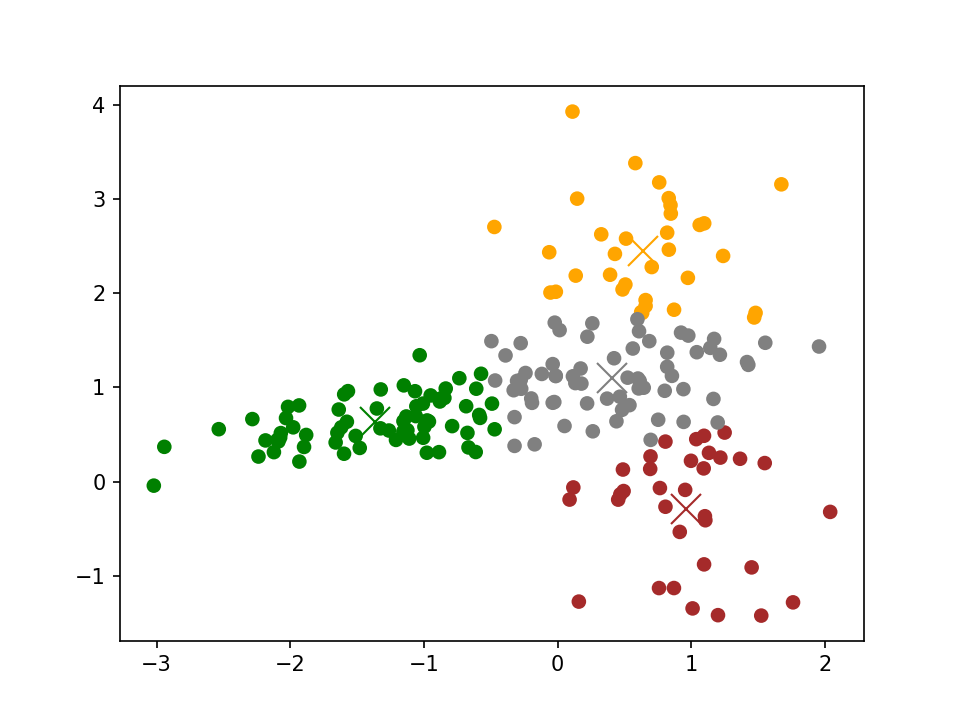

In [513]:
from matplotlib import animation
fig, ax = plt.subplots()


centroids = init_centroids(
    is_random = False, 
    amount =4, 
    points= points,
    seed = 2)
# closest_centroids= compute_closest_centroids(centroids) 

J_hist = [-1] # init -1 to let compare with first value 

def update(curr):

    ax.clear()

    global closest_centroids
    global centroids
    global J_hist

    ax.scatter(Xc_2[:,0], Xc_2[:,1], c= colors[closest_centroids])
    for i, c in enumerate (centroids):
        ax.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 


    closest_centroids = compute_closest_centroids(centroids) 
    centroids = compute_means(centroids, closest_centroids)
    
    new_J = J(centroids, closest_centroids)
    if J_hist[-1] == new_J:
        a.event_source.stop()
        
    J_hist.append(J(centroids, closest_centroids))
#     ax.plot(np.random.rand(10)) # use to test annimation is working 
    plt.title('Iteration # {}, J= {}'.format(curr, new_J)) # need to add it once more since it disappears with ax.clear()

a = animation.FuncAnimation(fig, update, interval=2000) # Note: you need to assign this in order to run the animation if you believe it necessary 



#### Review cost function

<IPython.core.display.Javascript object>


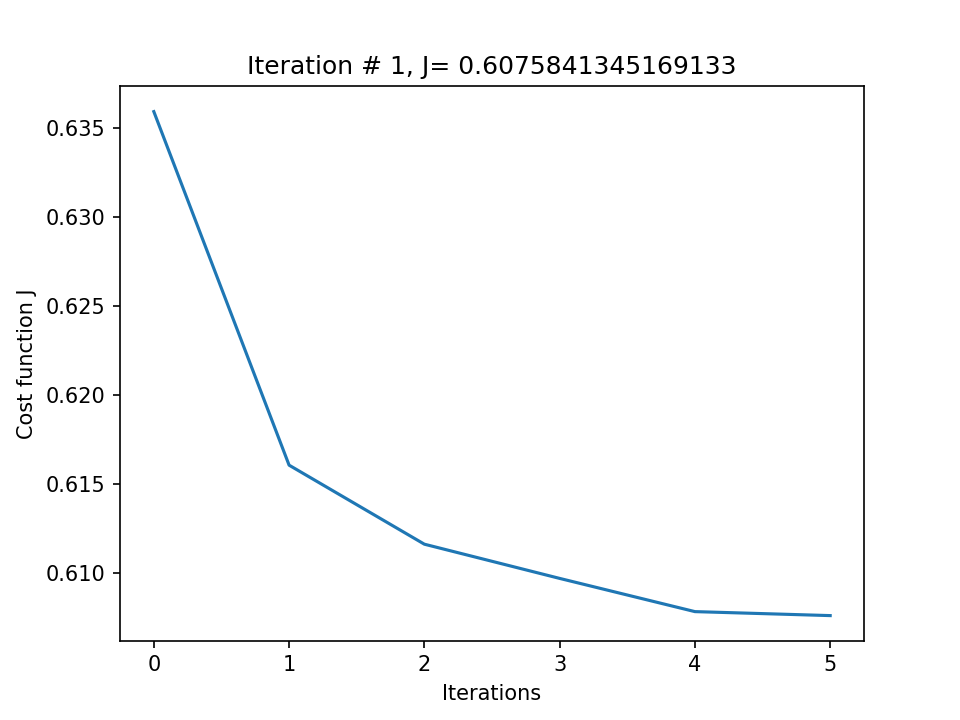

Text(0, 0.5, 'Cost function J')

In [514]:
def run_k_means(centroids):
    is_first_time= True 
    J_hist = []
    is_to_continue = True
    
    while is_to_continue:
        closest_centroids = compute_closest_centroids(centroids) 
        centroids = compute_means( centroids , closest_centroids) 
        new_J = J(centroids, closest_centroids)                
        if is_first_time:
            J_hist.append(J(centroids, closest_centroids))            
            is_first_time= False
            continue
        if J_hist[-1] == new_J:
            is_to_continue= False
        else: 
            J_hist.append(J(centroids, closest_centroids))         

    return centroids, closest_centroids, J_hist

centroids= init_centroids(amount = 4, points= points, is_random=False, seed= None )
centroids, closest_centroids, J_hist = run_k_means(centroids)
plt.figure ()
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost function J')


Here we see that we can choose number 2 of clusters, K=2.

#### Local optimas

<IPython.core.display.Javascript object>


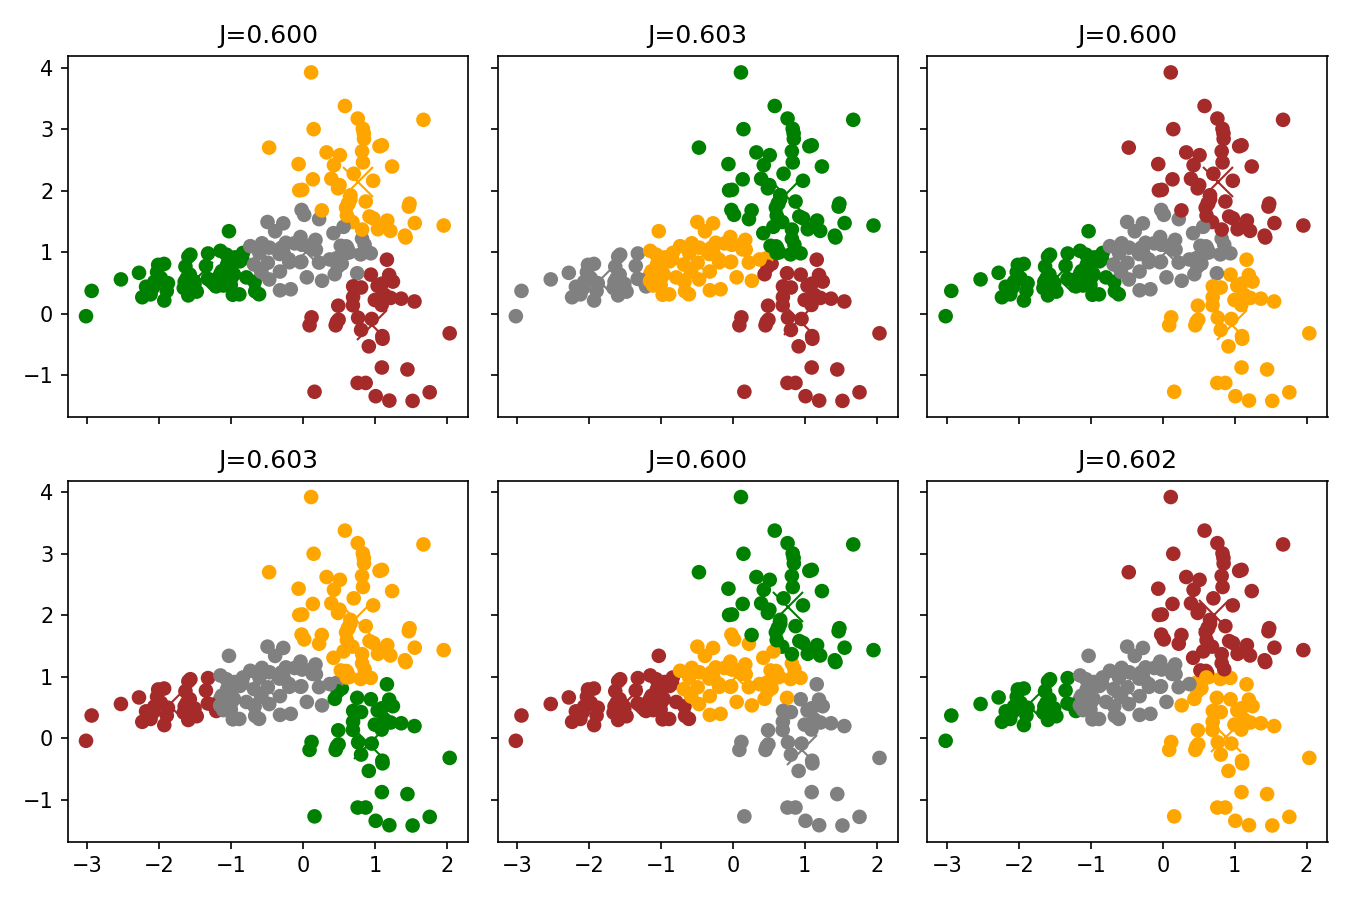

In [515]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize= (9,6))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for index_plot in range (6):
    centroids = init_centroids(is_random = True, amount =4, points= points,seed = None)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    print ()
    axes[index_plot].scatter(Xc_2[:,0], Xc_2[:,1], c= colors[closest_centroids])
    for i, c in enumerate (centroids):
        axes[index_plot].plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
    plt.sca(axes[index_plot])
    plt.title ('J={:.3f}'.format(J_hist[-1]))

plt.tight_layout()

#### Random initialization

<IPython.core.display.Javascript object>


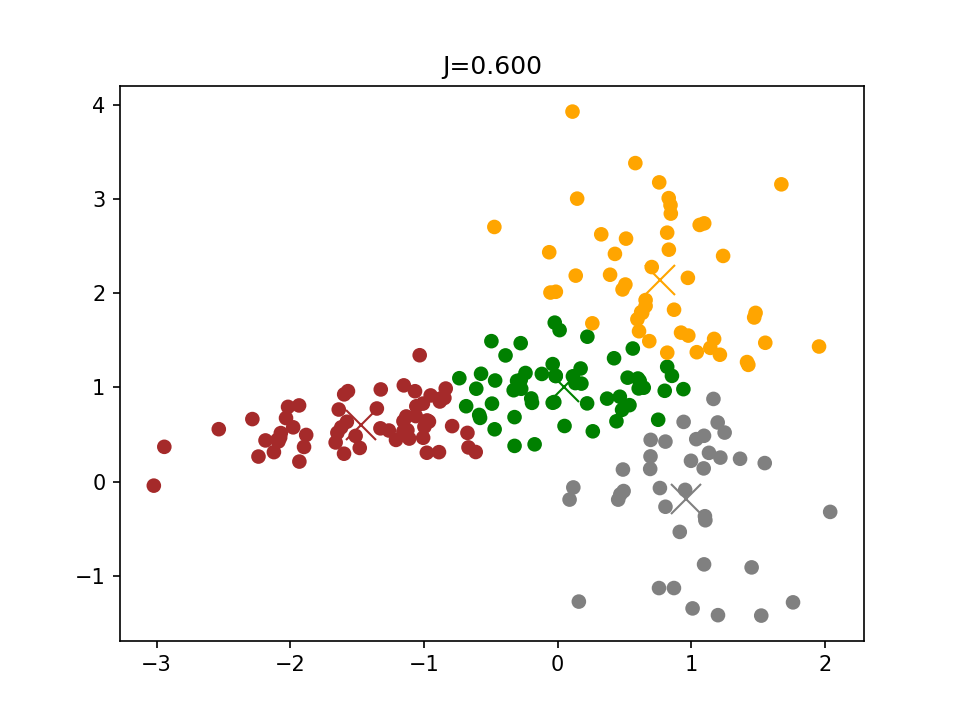

Text(0.5, 1.0, 'J=0.600')

In [516]:
best_result= []

for random_iter in range (100):  
    centroids = init_centroids(amount = 4, points= points, seed = None)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    
    if len(best_result)==0 or J_hist[-1] < best_result[2]:
        best_result= [centroids, closest_centroids, J_hist[-1]]

plt.figure()
plt.scatter(Xc_2[:,0], Xc_2[:,1], c= colors[best_result[1]])
for i, c in enumerate (best_result[0]):
    plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
plt.title ('J={:.3f}'.format(best_result[2]))

#### Sklearn kmeans

Якщо в clf = KMeans(n_clusters=4) добавити n, clf = KMeans(n_clusters=4,n), тоді викидає помилку positional argument follows keyword argument

In [538]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=4) # n_init : int, default: 10  - Number of time the k-means algorithm will be run with different centroid seeds.
clf.fit(points)

KMeans(n_clusters=4)

In [518]:
predicted= clf.predict(points)
predicted

array([0, 1, 3, 0, 2, 2, 3, 2, 2, 3, 1, 0, 3, 1, 2, 2, 1, 0, 2, 3, 2, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 3, 2, 2, 2, 2, 1, 0, 2, 2, 3, 2, 1, 1, 0,
       1, 2, 2, 1, 0, 1, 0, 0, 3, 2, 3, 3, 2, 2, 1, 3, 0, 2, 0, 2, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 3, 3, 2, 0, 1, 2, 2, 3, 1, 1, 3,
       3, 3, 2, 3, 3, 3, 2, 0, 0, 3, 1, 3, 3, 2, 0, 1, 2, 2, 2, 2, 2, 3,
       2, 3, 2, 3, 2, 1, 3, 3, 2, 3, 0, 3, 3, 2, 0, 1, 2, 3, 1, 2, 1, 3,
       1, 1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 2, 3, 0, 1, 2, 1, 2, 2, 0, 1, 1,
       1, 2, 3, 2, 0, 3, 1, 2, 0, 1, 2, 3, 0, 3, 2, 2, 1, 0, 1, 0, 0, 2,
       2, 0, 2, 1, 2, 3, 3, 1, 0, 3, 1, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 0,
       1, 3])

In [519]:
clf.cluster_centers_

array([[ 0.96220912, -0.18860474],
       [ 0.0467027 ,  0.99993105],
       [-1.46901201,  0.59888478],
       [ 0.76885808,  2.14333659]])

<IPython.core.display.Javascript object>


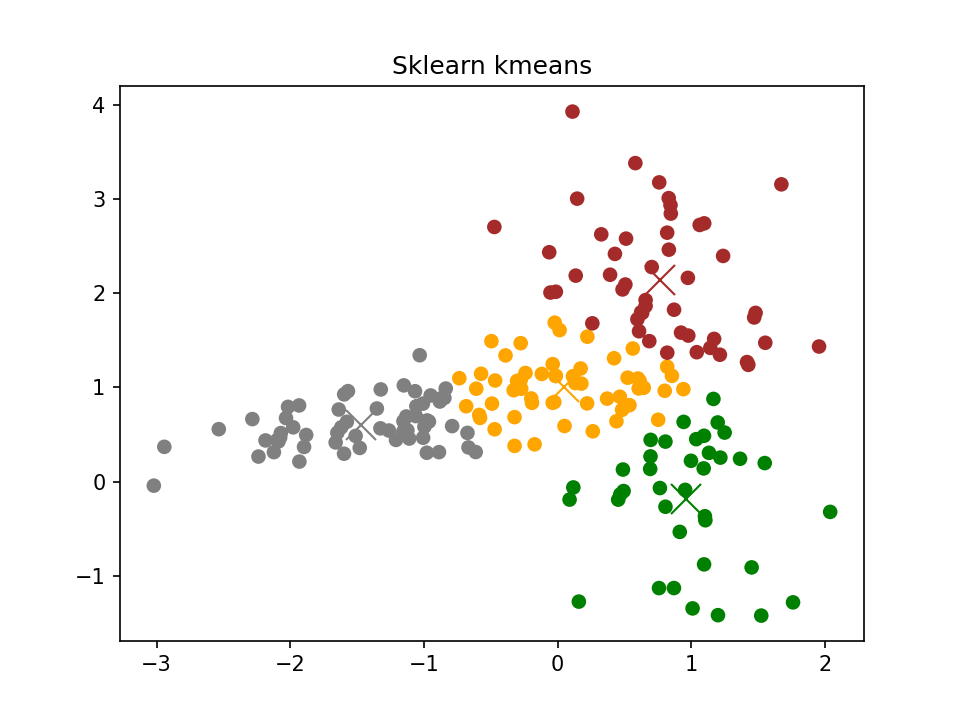

Text(0.5, 1.0, 'Sklearn kmeans')

In [520]:
x1, x2 = np.array(list((zip(*points))))

plt.figure()

# draw samples 
plt.scatter(x1,x2, c= colors[predicted])

# draw centroids 
for i, c in enumerate (clf.cluster_centers_):    
    plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
    
plt.title ('Sklearn kmeans')

#### Loading synthetic dataset

In [521]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)

Synthetic dataset


<IPython.core.display.Javascript object>


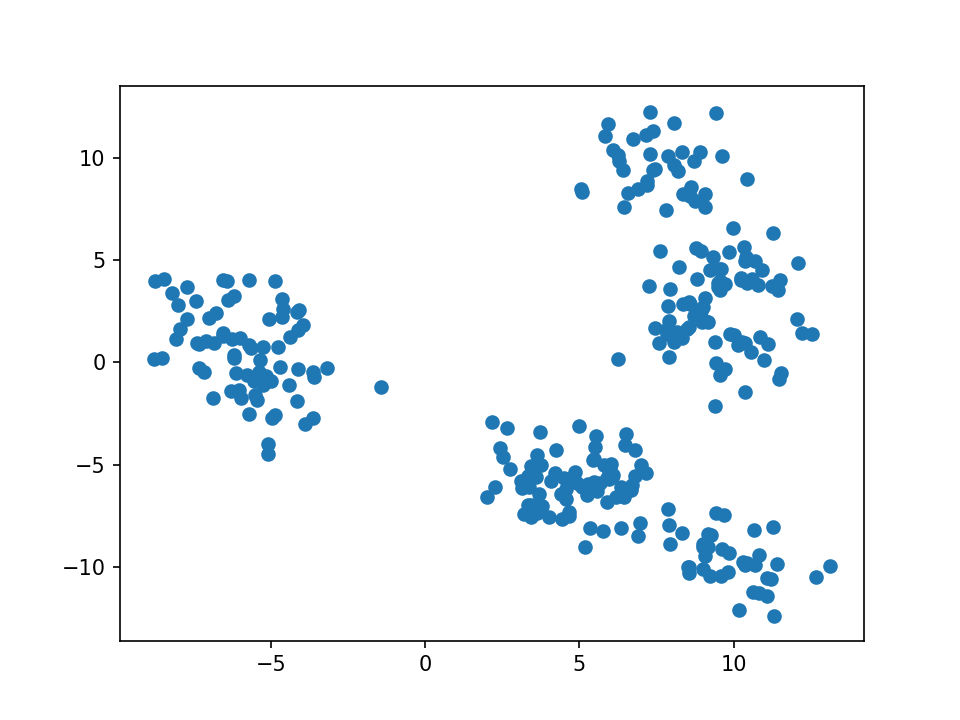

In [522]:
colors = np.array(['green','orange','grey','brown','blue'])
def plot_points(closest_centroids = None):
    if closest_centroids is None:
        plt.scatter(X_D2[:,0], X_D2[:,1])
    else:
        plt.scatter(X_D2[:,0], X_D2[:,1], c= colors[closest_centroids])

print('Synthetic dataset')       
plt.figure()
plot_points()

#### Init centroids

[[ -5  -5]
 [  5  -7]
 [  7  10]
 [  8   3]
 [ 10 -10]]


<IPython.core.display.Javascript object>


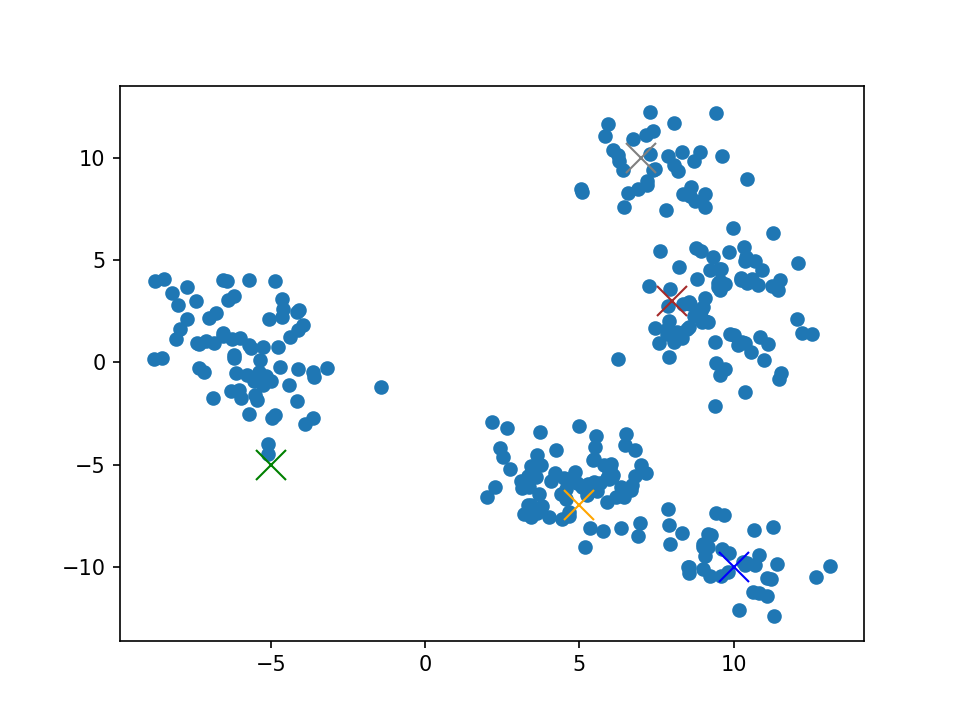

In [523]:
def init_centroids(amount, is_random = True, points = None, seed = 10): 
    if is_random:
        np.random.seed = (seed) 
        return points [np.random.choice(len(points), amount)]        
    else:
        centroids = np.array ([(-5,-5), (5,-7), (7,10), (8,3), (10,-10)])
        return centroids[:amount]

# centroids = init_centroids(2, is_random= False)
centroids = init_centroids(5, is_random= False)
print (centroids)

def plot_centroids(centroids):
    for i, c in enumerate (centroids):
        plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 

def draw_state(centroids = None, closest_centroids = None):        
    plt.figure ()
    plot_points(closest_centroids)
    plot_centroids(centroids)

draw_state(centroids = centroids, closest_centroids=None)

#### Convert data into single array

In [524]:
points = np.array(list((zip(X_D2[:,0], X_D2[:,1]))), dtype=object)
points[:6]

array([[-5.9717884726480115, -1.7591388475245326],
       [3.5863563137421215, -5.613890582517603],
       [6.6628051433748485, -6.252550225754092],
       [11.445015320809059, 3.5246375286572964],
       [10.693342819436822, -9.900921982964068],
       [9.620473341641222, 10.107742355158242]], dtype=object)

#### Compute distances from samples to centroids

In [525]:
def compute_distances(samples, centroids):
    '''
    params:
        samples - array of samples(pairs of coordinates) to compute from each the distance to sentroid e.g. array([[17, 83],[50, 67]])
        centroids - array of centroids coordinates e.g. array([[20, 20],[60, 80],[60, 10]])
    retruns: 2d array of distances from each sample to all centroid - the axis 0-centroids, 1-samples 
    '''    
    return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

# compute_distances(points[:3], centroids[:1]) # Note: make sue it is array/list of centroids not the single centroid  

compute_distances(points, centroids)

array([[ 3.38342339,  8.60827372, 11.72987237, ..., 17.77748161,
        10.94431053, 11.38938166],
       [12.15922563,  1.97982014,  1.82307491, ..., 12.3088982 ,
         2.03475225,  1.60131766],
       [17.50841634, 15.98269509, 16.25604777, ...,  6.70947323,
        19.11426818, 16.12890439],
       [14.76009064,  9.67880992,  9.34867775, ...,  2.52116258,
        12.35407277,  9.26605602],
       [17.97247394,  7.76999235,  5.01799256, ..., 14.13404255,
         4.92067239,  5.34103165]])

#### Compute Cost

In [526]:
def J(centroids, closest_centroids):
    '''
    params: 
        centroids - list/array of pairs (coordinnates)  of centroids e.g. centroids = [(20,20), (60,80), (60,10)]
        closest_centroids - array of len= m (number of samples) that contains indices of centroids e.g. [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2
         1 2 2]
    '''
    all_dist = [] 
    for c_index in set(closest_centroids):
        assigned_samples = points[np.where(closest_centroids==c_index)]# select only points assigned to centroid
        all_dist_centroid = compute_distances(assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
    m = len(closest_centroids)
    return 1/m* np.sum(all_dist)


closest_centroids= np.zeros(len(points), dtype=int) # compute for case of all samples assigned to first centroid
print ('Cost= {}'.format(J(centroids, closest_centroids)))

Cost= 12.474778753783216


#### Step 1 of iteration: compute closest centroids

closest_centroids:
 [0 1 1 3 4 2 1 0 4 3 0 0 3 0 3 0 1 0 1 1 3 0 4 2 0 1 1 0 3 4 4 1 4 0 0 2 3
 1 1 1 3 0 4 1 2 2 3 1 3 1 0 0 2 0 3 2 0 4 4 3 1 0 3 3 3 0 0 3 3 4 3 0 0 3
 0 3 0 4 1 2 0 1 3 2 4 1 1 3 1 0 3 3 1 3 3 0 2 3 2 2 1 3 1 4 1 4 1 3 0 1 1
 0 2 0 3 3 1 4 3 1 0 3 1 3 1 4 0 4 0 4 1 0 1 0 2 3 4 4 0 2 1 4 1 2 4 3 3 1
 1 1 2 0 3 1 0 1 2 0 2 3 1 3 1 3 3 0 4 1 0 3 0 1 1 1 2 4 1 0 1 2 3 4 3 0 0
 4 3 1 0 4 0 0 0 2 0 4 2 1 2 0 4 3 2 0 2 0 3 3 2 3 1 1 4 3 4 3 0 1 0 3 1 4
 3 3 1 0 3 3 1 0 0 1 3 3 0 0 3 1 3 2 4 2 0 2 2 0 3 3 1 0 2 3 1 3 1 0 1 1 1
 2 1 3 4 1 3 1 0 1 0 3 0 2 0 2 1 2 1 1 0 3 3 0 2 0 3 3 0 1 0 4 4 3 3 1 0 4
 3 3 1 1]
Cost= 2.9967488180928377


<IPython.core.display.Javascript object>


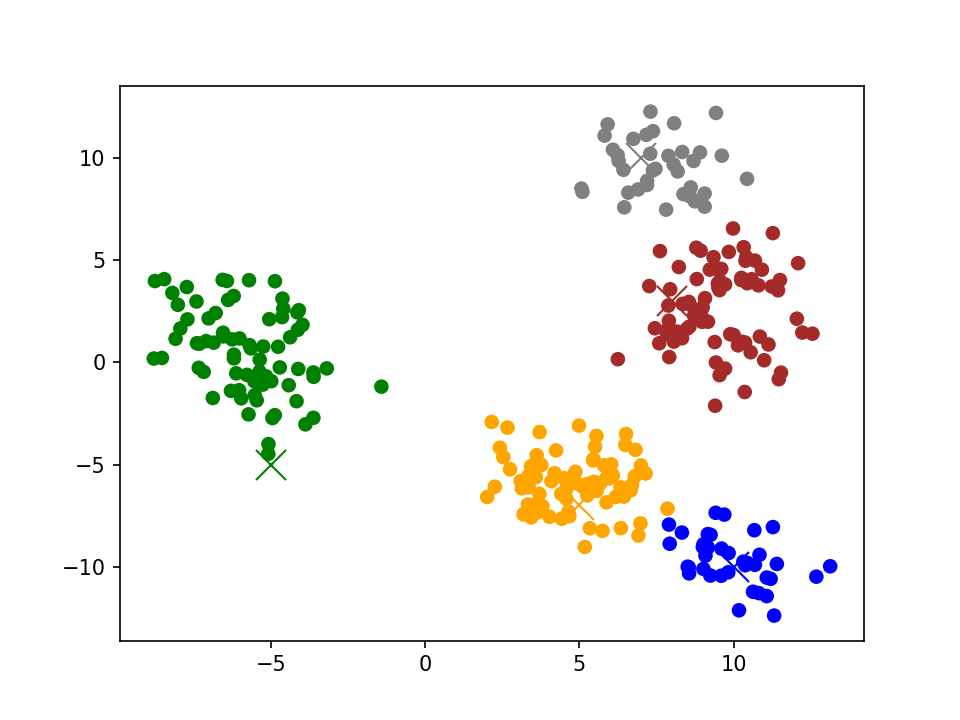

In [527]:
def compute_closest_centroids(centroids):       
    all_distances = compute_distances(points, centroids)
    #np.array([np.apply_along_axis(np.linalg.norm,1,points-c) for c in centroids])
    closest_centroids = np.apply_along_axis(np.argmin,0,all_distances)
    return closest_centroids

closest_centroids = compute_closest_centroids(centroids) 
print ('closest_centroids:\n',closest_centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)

#### Step 2 of iteration: compute means

New centroids: [array([-5.806796125908662, 0.5496644765887464], dtype=object), array([4.879842681208736, -5.872271538976446], dtype=object), array([7.565621481205773, 9.581124488974943], dtype=object), array([9.582675825592522, 2.6483270882290966], dtype=object), array([9.971044402473005, -9.678271539641063], dtype=object)]
Cost= 1.9331525092958104


<IPython.core.display.Javascript object>


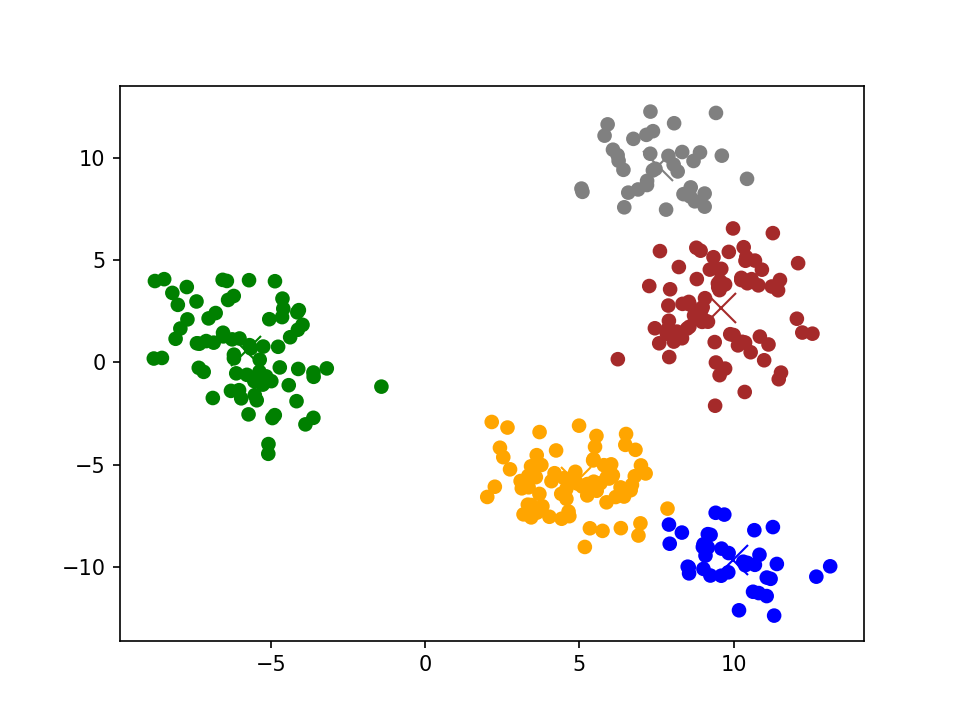

In [528]:
def compute_means(centroids, closest_centroids):     # need to consider all centroids in case of no assigned points to some centroid  
    new_centroids= []
    for i in range (len(centroids)):
        if i not in closest_centroids: # no assigned point assigned to this centroid 
            new_centroids.append(centroids[i])
        else: 
            new_centroid= np.mean(points[np.where(closest_centroids==i)], axis = 0)
            new_centroids.append(new_centroid)
    return new_centroids

centroids = compute_means(centroids, closest_centroids)
print ('New centroids:',centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)

#### Iterate

<IPython.core.display.Javascript object>


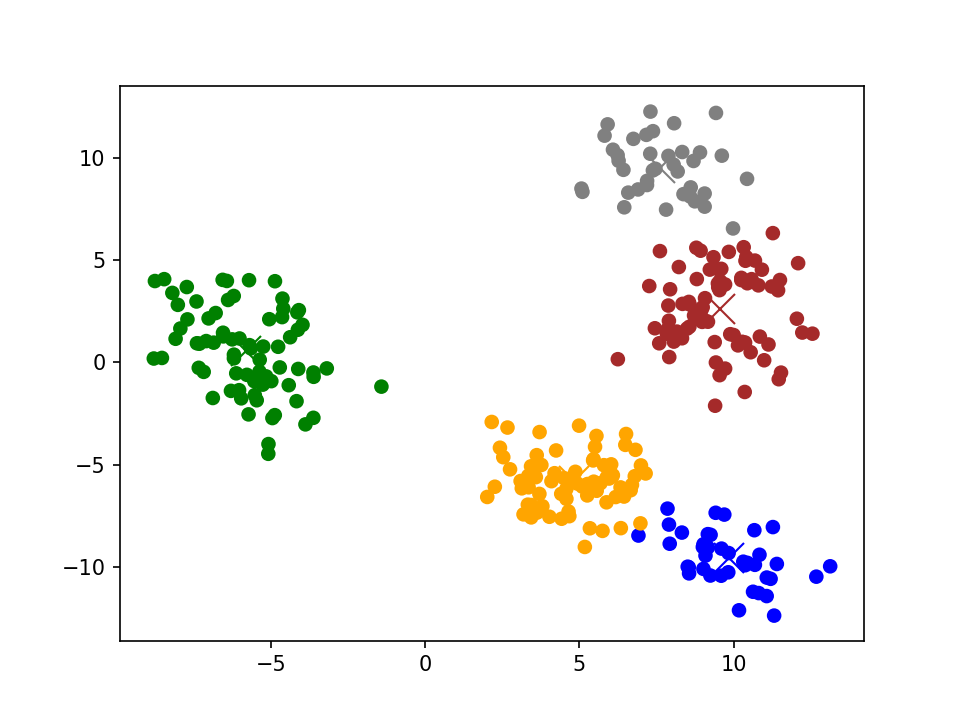

In [529]:
from matplotlib import animation
fig, ax = plt.subplots()


centroids = init_centroids(
    is_random = False, 
    amount =5, 
    points= points,
    seed = 2)
# closest_centroids= compute_closest_centroids(centroids) 

J_hist = [-1] # init -1 to let compare with first value 

def update(curr):

    ax.clear()

    global closest_centroids
    global centroids
    global J_hist

    ax.scatter(X_D2[:,0], X_D2[:,1], c= colors[closest_centroids])
    for i, c in enumerate (centroids):
        ax.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 


    closest_centroids = compute_closest_centroids(centroids) 
    centroids = compute_means(centroids, closest_centroids)
    
    new_J = J(centroids, closest_centroids)
    if J_hist[-1] == new_J:
        a.event_source.stop()
        
    J_hist.append(J(centroids, closest_centroids))
#     ax.plot(np.random.rand(10)) # use to test annimation is working 
    plt.title('Iteration # {}, J= {}'.format(curr, new_J)) # need to add it once more since it disappears with ax.clear()

a = animation.FuncAnimation(fig, update, interval=2000) # Note: you need to assign this in order to run the animation if you believe it necessary 



#### Review cost function

<IPython.core.display.Javascript object>


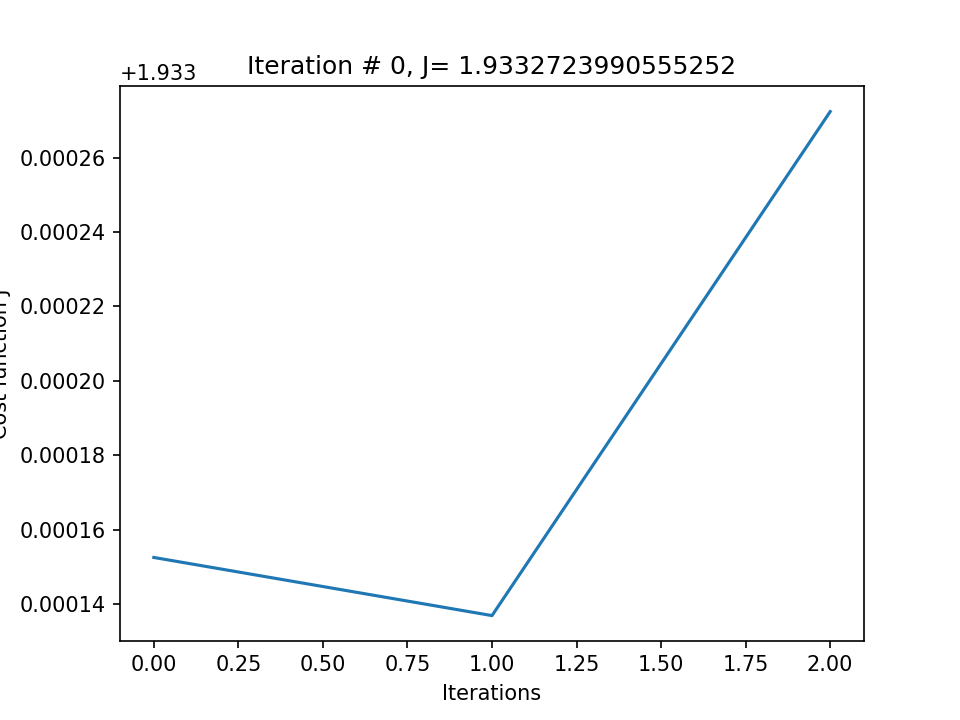

Text(0, 0.5, 'Cost function J')

In [530]:
def run_k_means(centroids):
    is_first_time= True 
    J_hist = []
    is_to_continue = True
    
    while is_to_continue:
        closest_centroids = compute_closest_centroids(centroids) 
        centroids = compute_means( centroids , closest_centroids) 
        new_J = J(centroids, closest_centroids)                
        if is_first_time:
            J_hist.append(J(centroids, closest_centroids))            
            is_first_time= False
            continue
        if J_hist[-1] == new_J:
            is_to_continue= False
        else: 
            J_hist.append(J(centroids, closest_centroids))         

    return centroids, closest_centroids, J_hist

centroids= init_centroids(amount = 5, points= points, is_random=False, seed= None )
centroids, closest_centroids, J_hist = run_k_means(centroids)
plt.figure ()
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost function J')



We can choose number 1 of clusters, k=1.

#### Local optimas

<IPython.core.display.Javascript object>


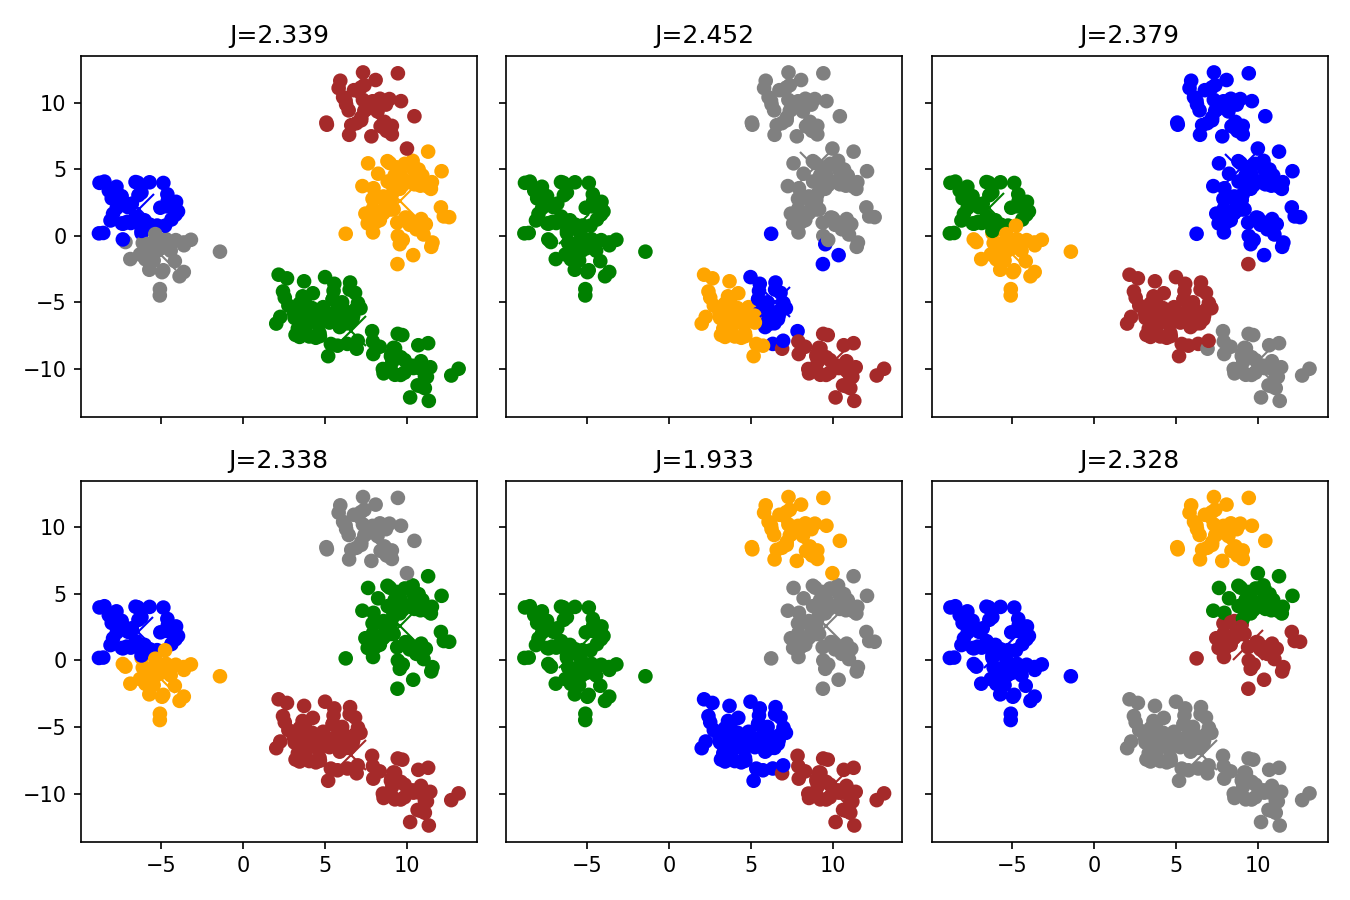

In [531]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize= (9,6))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for index_plot in range (6):
    centroids = init_centroids(is_random = True, amount =5, points= points,seed = None)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    print ()
    axes[index_plot].scatter(X_D2[:,0], X_D2[:,1], c= colors[closest_centroids])
    for i, c in enumerate (centroids):
        axes[index_plot].plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
    plt.sca(axes[index_plot])
    plt.title ('J={:.3f}'.format(J_hist[-1]))

plt.tight_layout()

#### Random initialization

<IPython.core.display.Javascript object>


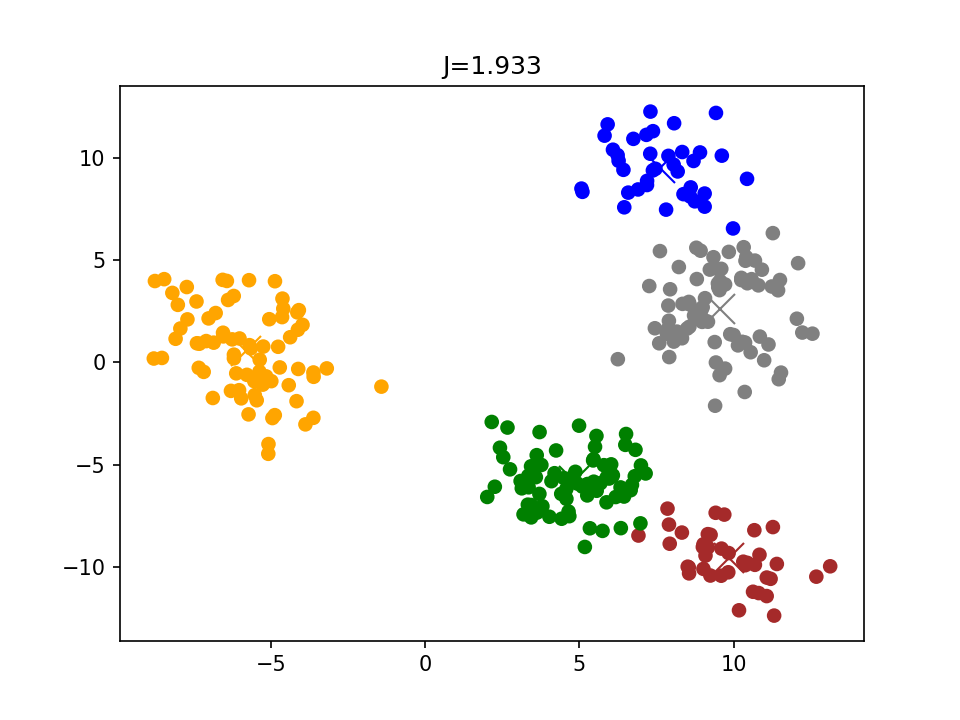

Text(0.5, 1.0, 'J=1.933')

In [532]:
best_result= []

for random_iter in range (100):  
    centroids = init_centroids(amount = 5, points= points, seed = None)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    
    if len(best_result)==0 or J_hist[-1] < best_result[2]:
        best_result= [centroids, closest_centroids, J_hist[-1]]

plt.figure()
plt.scatter(X_D2[:,0], X_D2[:,1], c= colors[best_result[1]])
for i, c in enumerate (best_result[0]):
    plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
plt.title ('J={:.3f}'.format(best_result[2]))


#### Sklearn kmeans

Якщо в clf = KMeans(n_clusters=5) добавити n, clf = KMeans(n_clusters=5,n), тоді викидає помилку positional argument follows keyword argument

In [533]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=5) # n_init : int, default: 10  - Number of time the k-means algorithm will be run with different centroid seeds.
clf.fit(points)

KMeans(n_clusters=5)

In [534]:
predicted= clf.predict(points)
predicted

array([0, 4, 4, 1, 2, 3, 4, 0, 2, 1, 0, 0, 1, 0, 1, 0, 4, 0, 4, 4, 1, 0,
       2, 3, 0, 4, 4, 0, 1, 2, 2, 4, 2, 0, 0, 3, 1, 4, 4, 4, 1, 0, 2, 4,
       3, 3, 1, 4, 1, 4, 0, 0, 3, 0, 1, 3, 0, 2, 2, 1, 2, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 4, 3, 0, 4, 1, 3, 2, 4, 4, 1,
       4, 0, 1, 1, 4, 1, 1, 0, 3, 1, 3, 3, 4, 1, 4, 2, 4, 2, 4, 1, 0, 4,
       4, 0, 3, 0, 1, 1, 4, 2, 1, 4, 0, 1, 4, 1, 4, 2, 0, 2, 0, 2, 4, 0,
       4, 0, 3, 1, 2, 2, 0, 3, 4, 2, 4, 3, 2, 1, 1, 4, 4, 4, 3, 0, 1, 4,
       0, 4, 3, 0, 3, 1, 4, 1, 4, 1, 1, 0, 2, 4, 0, 1, 0, 4, 4, 4, 3, 2,
       4, 0, 4, 3, 1, 2, 1, 0, 0, 2, 1, 4, 0, 2, 0, 0, 0, 3, 0, 2, 3, 4,
       3, 0, 2, 1, 3, 0, 3, 0, 1, 1, 3, 1, 4, 4, 2, 1, 2, 1, 0, 4, 0, 3,
       4, 2, 1, 1, 4, 0, 1, 1, 4, 0, 0, 4, 1, 1, 0, 0, 1, 4, 1, 3, 2, 3,
       0, 3, 3, 0, 1, 1, 4, 0, 3, 1, 4, 1, 4, 0, 4, 4, 2, 3, 4, 1, 2, 4,
       1, 4, 0, 4, 0, 1, 0, 3, 0, 3, 4, 3, 4, 4, 0, 1, 1, 0, 3, 0, 1, 1,
       0, 4, 0, 2, 2, 1, 1, 4, 0, 2, 1, 1, 4, 4])

In [535]:
clf.cluster_centers_

array([[-5.80679613,  0.54966448],
       [ 9.57732267,  2.59632561],
       [ 9.83850413, -9.5825329 ],
       [ 7.62926731,  9.50131695],
       [ 4.81209494, -5.81986353]])

<IPython.core.display.Javascript object>


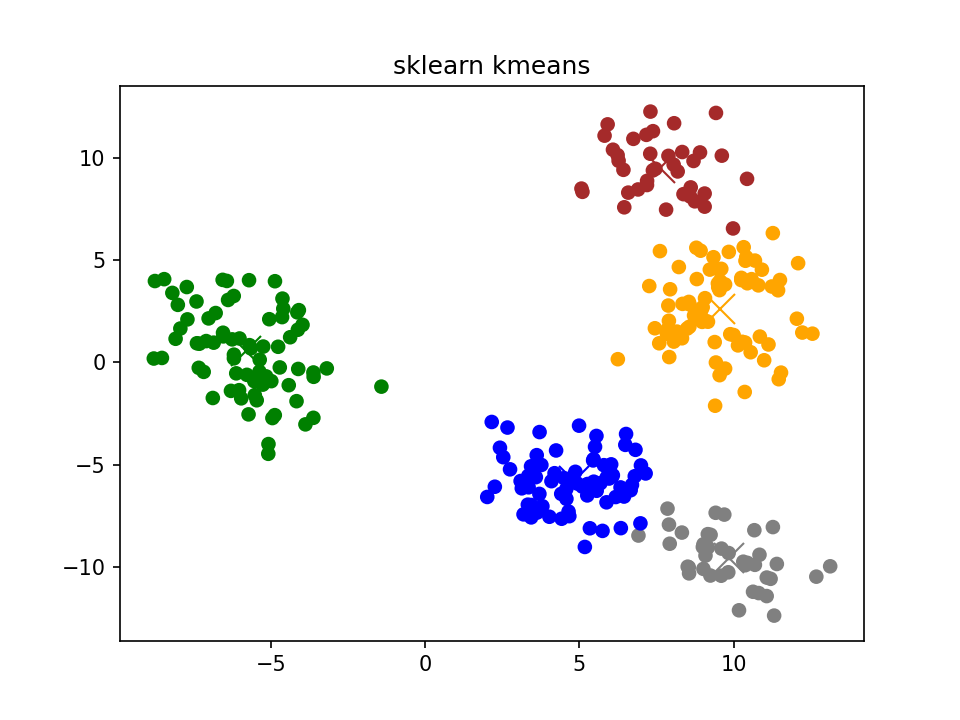

Text(0.5, 1.0, 'sklearn kmeans')

In [536]:
x1, x2 = np.array(list((zip(*points))))

plt.figure()

# draw samples 
plt.scatter(x1, x2, c= colors[predicted])

# draw centroids 
for i, c in enumerate (clf.cluster_centers_):    
    plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
    
plt.title ('sklearn kmeans')
